In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn ipywidgets matplotlib seaborn

Mean Absolute Error (MAE): 336029.35


IntText(value=0, description='Bedrooms:')

FloatText(value=0.0, description='Bathrooms:')

IntText(value=0, description='Zipcode:')

FloatText(value=0.0, description='Size (sq ft):')

Button(description='Predict Price', style=ButtonStyle())

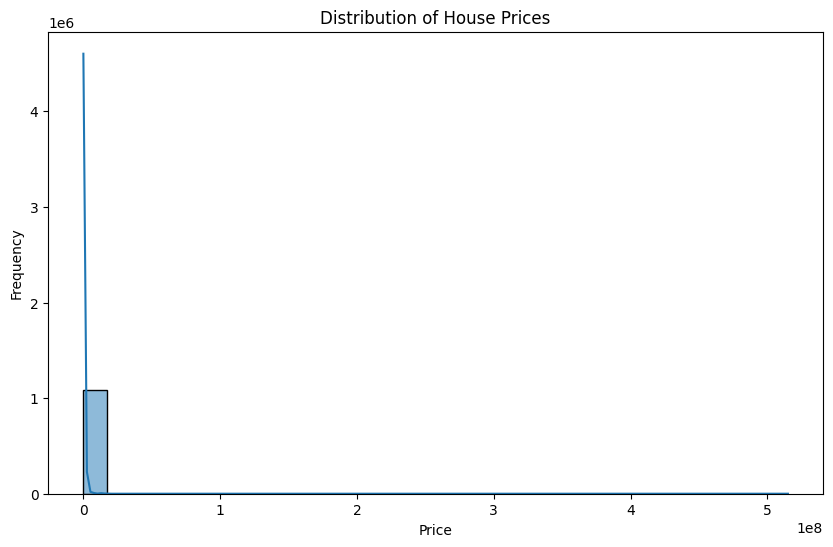

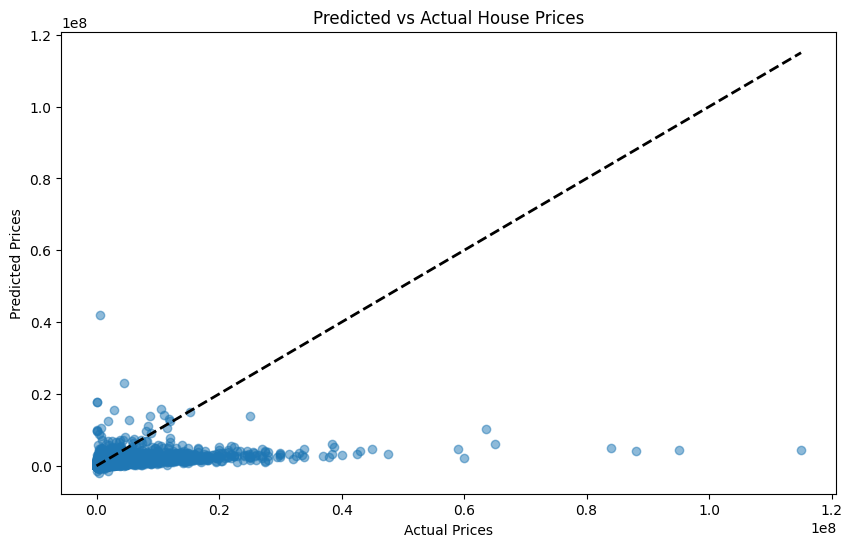

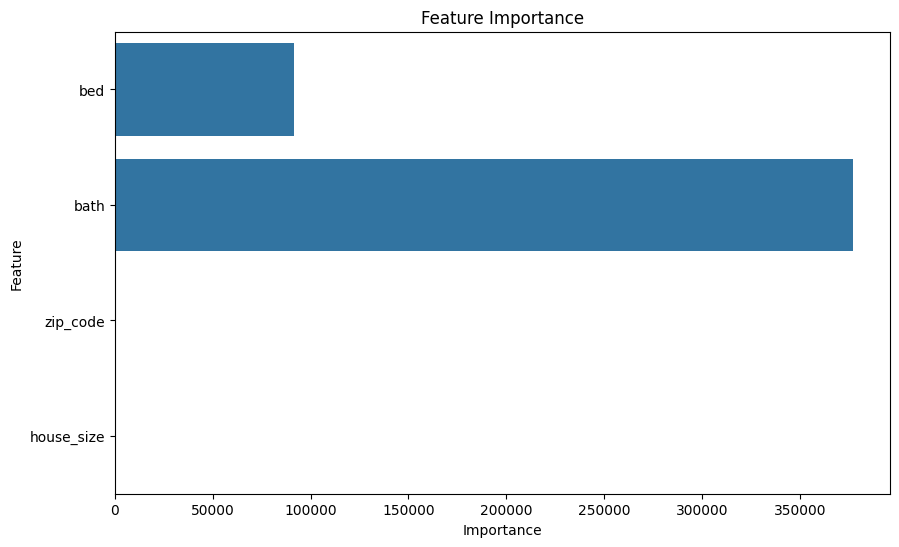

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and remove rows with missing data
data = pd.read_csv('real_estate_data.csv.gz')
data = data.dropna()

# Select features and target
X = data[['bed', 'bath', 'zip_code', 'house_size']]
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate and display the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Create UI and Display UI
bedrooms = widgets.IntText(description='Bedrooms:')
bathrooms = widgets.FloatText(description='Bathrooms:')
zipcode = widgets.IntText(description='Zipcode:')
house_size = widgets.FloatText(description='Size (sq ft):')
button = widgets.Button(description='Predict Price')

display(bedrooms, bathrooms, zipcode, house_size, button)

# Predict algorithm
def predict_price(b):
    input_data = np.array([[bedrooms.value, bathrooms.value, zipcode.value, house_size.value]])
    predicted_price = model.predict(input_data)
    print(f"Predicted Price: ${predicted_price[0]:,.2f}")

# Attach the function to the button click
button.on_click(predict_price)

# Visualizations

# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# 3. Feature Importance
importance = np.abs(model.coef_)
features = ['bed', 'bath', 'zip_code', 'house_size']

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
